## Libraries


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

[Curve Fitting theory](https://www.engr.uidaho.edu/thompson/courses/ME330/lecture/least_squares.html)

## Exponential Curve Fit
y = ae<sup>bx</sup>
<br>
Total Squared Error:
E<sup>2</sup> = SUMMATION i=1,N [ y - ae<sup>bx<sub>i</sub></sup> ]<sup>2</sup>

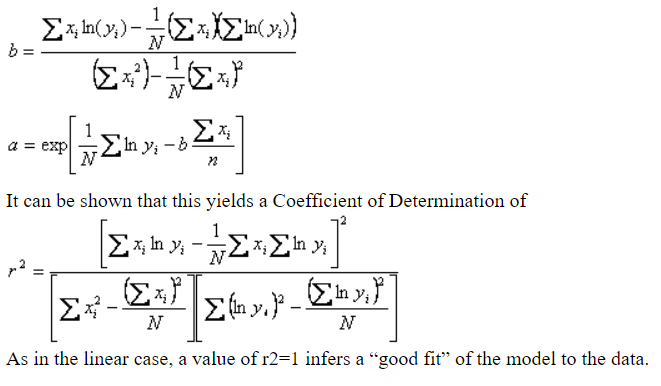

In [ ]:
def exponential_curve_fit(x, y):
  x_arr = np.array(x)
  y_arr = np.array(y)
  N = len(x)

  # Calculating b
  val1 = np.sum(x_arr*np.log(y_arr))
  val2 = (-1/N)*(np.sum(x_arr)*(np.sum(np.log(y_arr))))
  val3 = np.sum(np.square(x_arr))
  val4 = (-1/N)*(np.square(np.sum(x_arr)))
  b = (val1 + val2)/(val3 + val4)

  # Calculating a
  val5 = (1/N)*(np.sum(np.log(y_arr)))
  val6 = -b*(np.sum(x_arr)/N)
  a = np.exp(val5 + val6)

 # r2 value
  val7 = np.sum(np.square(np.log(y_arr)))
  val8 = (-1/N)*(np.square(np.sum(np.log(y_arr))))
  r2 = ((val1 + val2)**2)/((val3 + val4)*(val7 + val8))

  result = {'a': a, 'b': b, 'r2': r2}
  return result

## Power Curve Fit
y = a x<sup> b</sup>
<br>
Total Squared Error:
E<sup>2</sup> = SUMMATION i=1,N [ y - a x<sub>i</sub><sup>b</sup> ]<sup>2</sup>
<br>
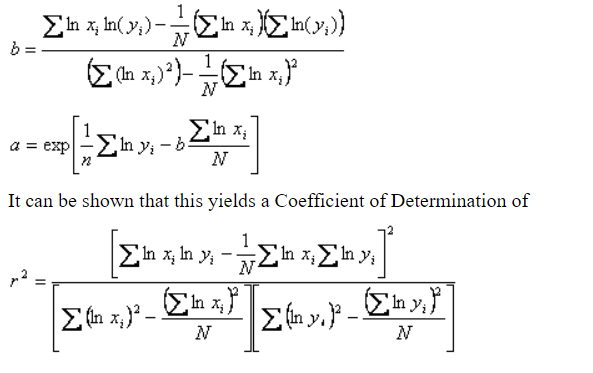

In [ ]:
def power_curve_fit(x, y):
  x_arr = np.array(x)
  y_arr = np.array(y)
  N = len(x)

  # Calculating b
  val1 = np.sum(np.log(x_arr)*np.log(y_arr))
  val2 = (-1/N)*(np.sum(np.log(x_arr))*(np.sum(np.log(y_arr))))
  val3 = np.sum(np.square(np.log(x_arr)))
  val4 = (-1/N)*(np.square(np.sum(np.log(x_arr))))
  b = (val1 + val2)/(val3 + val4)

  # Calculating a
  val5 = (1/N)*(np.sum(np.log(y_arr)))
  val6 = -b*(np.sum(np.log(x_arr))/N)
  a = np.exp(val5 + val6)

 # r2 value
  val7 = np.sum(np.square(np.log(y_arr)))
  val8 = (-1/N)*(np.square(np.sum(np.log(y_arr))))
  r2 = ((val1 + val2)**2)/((val3 + val4)*(val7 + val8))

  result = {'a': a, 'b': b, 'r2': r2}
  return result

## Method of Least Square
y = a + b x
<br>
Total Squared Error:
E<sup>2</sup> = SUMMATION i = 1, N [ y<sub>i</sub> - (a + b x<sub>i</sub>) ]<sup>2</sup>
<br>
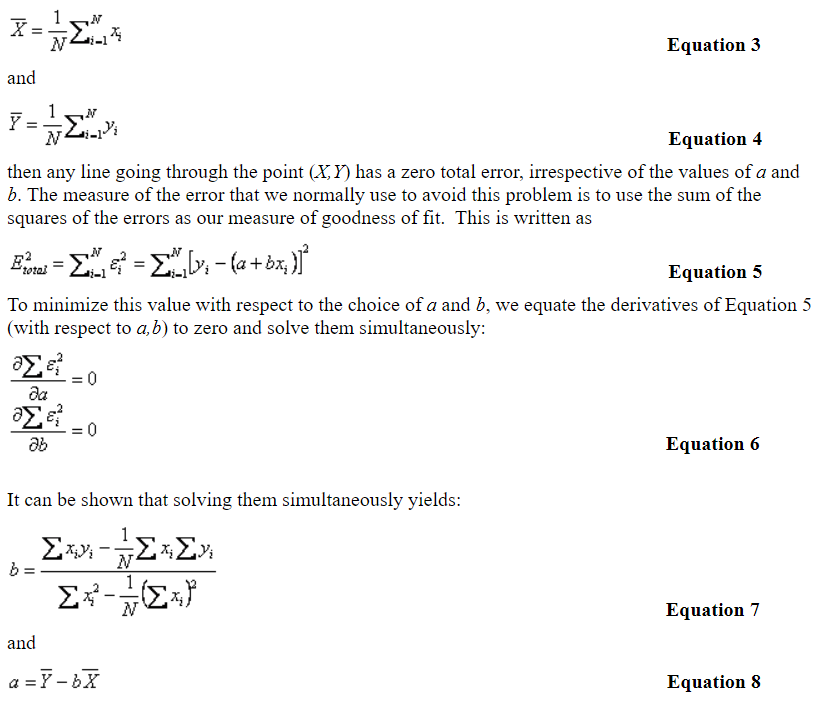

In [ ]:
def method_least_square(x, y):
  x_arr = np.array(x)
  y_arr = np.array(y)
  N = len(x)
  # Calculating b
  val1 = np.sum(x_arr*y_arr)
  val2 = (-1/N)*(np.sum(x_arr)*np.sum(y_arr))
  val3 = np.sum(np.square(x_arr))
  val4 = (-1/N)*(np.square(np.sum(x_arr)))
  b = (val1 + val2) / (val3 + val4)

  # Calculating a
  y_arr_mean = np.mean(y_arr)
  x_arr_mean = np.mean(x_arr)
  a = y_arr_mean - (b*x_arr_mean)

  # Calculating r2
  val5 = np.sum(np.square(y_arr))
  val6 = (-1/N)*(np.square(np.sum(y_arr)))
  r2 = ((val1 + val2)**2 )/ ((val3 + val4)*(val5 + val6))

  result = {'a': a, 'b': b, 'r2': r2}
  return result

## Number of topics vs Coherence Values

In [ ]:
coherence_topics = [0.4048223019407592, 0.4676388252010352, 0.4796279020723006, 0.4770809870073456, 0.4759895900112251, 0.4495640451714338, 0.4592129140352393, 0.42881682586055375, 0.4102821117313581, 0.41324611289867125, 0.38935282883286887, 0.37792997240752146, 0.3778223605315474]
no_of_topics = [2, 8, 14, 20, 26, 32, 38, 44, 50, 56, 62, 68, 74]

### Exponential Curve fit Result for No of Topics Vs Coherence value

In [ ]:
res_exp_curve = exponential_curve_fit(no_of_topics, coherence_topics)
res_exp_curve

{'a': 0.4788386050907482,
 'b': -0.0028282591104735275,
 'r2': 0.5398758360212594}

<h3>Y = 0.47883 e<sup> -0.00282 X</sup>
<h3>r<sup> 2</sup> = 53% </h3>

In [ ]:
exp_curve_coherence_calculated = []
for i in no_of_topics:
  exp_curve_coherence_calculated.append(0.47883*(math.exp(-0.00282*i)))

In [ ]:
for i in range(len(coherence_topics)):
  print("True coherence: ", coherence_topics[i]," Calculated coherence: ", exp_curve_coherence_calculated[i])

True coherence:  0.4048223019407592  Calculated coherence:  0.47613700019804156
True coherence:  0.4676388252010352  Calculated coherence:  0.468148535150492
True coherence:  0.4796279020723006  Calculated coherence:  0.4602940978592171
True coherence:  0.4770809870073456  Calculated coherence:  0.45257143965199453
True coherence:  0.4759895900112251  Calculated coherence:  0.4449783495840615
True coherence:  0.4495640451714338  Calculated coherence:  0.43751265380513643
True coherence:  0.4592129140352393  Calculated coherence:  0.43017221493706004
True coherence:  0.42881682586055375  Calculated coherence:  0.42295493146187874
True coherence:  0.4102821117313581  Calculated coherence:  0.4158587371201943
True coherence:  0.41324611289867125  Calculated coherence:  0.4088816003196074
True coherence:  0.38935282883286887  Calculated coherence:  0.402021523553087
True coherence:  0.37792997240752146  Calculated coherence:  0.395276542827097
True coherence:  0.3778223605315474  Calculate

In [ ]:
exponential_curve_mse = mean_squared_error(coherence_topics, exp_curve_coherence_calculated)

### Power Curve fit Result for No of Topics Vs Coherence value

In [ ]:
res_power_curve = power_curve_fit(no_of_topics, coherence_topics)
res_power_curve

{'a': 0.4793838525904511,
 'b': -0.032728779481990794,
 'r2': 0.13932373821800112}

<h3>Y = 0.4794 X<sup> -0.0327</sup>
<h3>r<sup> 2</sup> = 14% </h3>

In [ ]:
power_curve_coherence_calculated = []
for i in no_of_topics:
  power_curve_coherence_calculated.append(0.4794*(math.pow(i, -0.0327)))

In [ ]:
for i in range(len(coherence_topics)):
  print("True coherence: ", coherence_topics[i]," Calculated coherence: ", power_curve_coherence_calculated[i])

True coherence:  0.4048223019407592  Calculated coherence:  0.46865618059858516
True coherence:  0.4676388252010352  Calculated coherence:  0.4478854839637898
True coherence:  0.4796279020723006  Calculated coherence:  0.4397639683107623
True coherence:  0.4770809870073456  Calculated coherence:  0.43466467713085327
True coherence:  0.4759895900112251  Calculated coherence:  0.4309515044980206
True coherence:  0.4495640451714338  Calculated coherence:  0.4280353381646704
True coherence:  0.4592129140352393  Calculated coherence:  0.4256367379091153
True coherence:  0.42881682586055375  Calculated coherence:  0.42360114679007066
True coherence:  0.4102821117313581  Calculated coherence:  0.42183412570822143
True coherence:  0.41324611289867125  Calculated coherence:  0.4202737655676126
True coherence:  0.38935282883286887  Calculated coherence:  0.41887729609131796
True coherence:  0.37792997240752146  Calculated coherence:  0.41761394117085726
True coherence:  0.3778223605315474  Calcu

In [ ]:
power_curve_mse = mean_squared_error(coherence_topics, power_curve_coherence_calculated)

### Method of Least Square Result for No of Topics Vs Coherence value

In [ ]:
res_mls = method_least_square(no_of_topics, coherence_topics)
res_mls

{'a': 0.47741603247517406,
 'b': -0.0012044972560230837,
 'r2': 0.5339391146272139}

<h3>Y = 0.4774 - (0.0012 * x)
<h3>r<sup> 2</sup> = 53% </h3>

In [ ]:
mls_coherence_calculated = []
for i in no_of_topics:
  mls_coherence_calculated.append(0.4774 - (0.0012*i))

In [ ]:
for i in range(len(coherence_topics)):
  print("True coherence: ", coherence_topics[i]," Calculated coherence: ", mls_coherence_calculated[i])

True coherence:  0.4048223019407592  Calculated coherence:  0.475
True coherence:  0.4676388252010352  Calculated coherence:  0.4678
True coherence:  0.4796279020723006  Calculated coherence:  0.4606
True coherence:  0.4770809870073456  Calculated coherence:  0.45339999999999997
True coherence:  0.4759895900112251  Calculated coherence:  0.4462
True coherence:  0.4495640451714338  Calculated coherence:  0.439
True coherence:  0.4592129140352393  Calculated coherence:  0.4318
True coherence:  0.42881682586055375  Calculated coherence:  0.4246
True coherence:  0.4102821117313581  Calculated coherence:  0.4174
True coherence:  0.41324611289867125  Calculated coherence:  0.4102
True coherence:  0.38935282883286887  Calculated coherence:  0.403
True coherence:  0.37792997240752146  Calculated coherence:  0.3958
True coherence:  0.3778223605315474  Calculated coherence:  0.3886


In [ ]:
mls_mse = mean_squared_error(coherence_topics, mls_coherence_calculated)

### Visualization

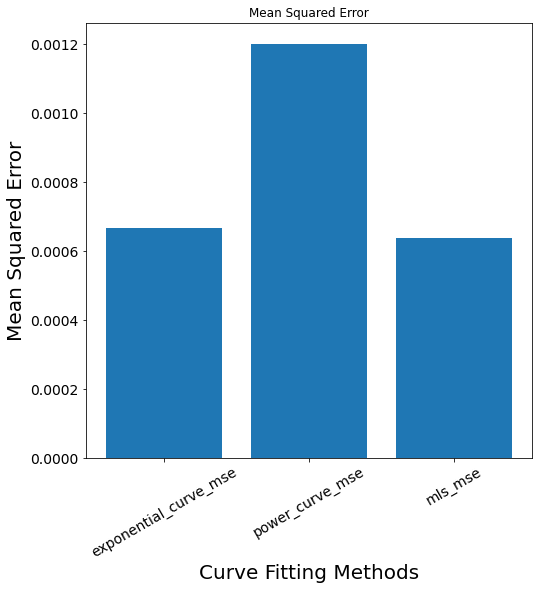

In [ ]:
x = ['exponential_curve_mse', 'power_curve_mse', 'mls_mse']
height = [exponential_curve_mse, power_curve_mse, mls_mse]
fig = plt.figure(figsize=(8, 8))
plt.bar(x, height)
plt.title('Mean Squared Error')
plt.xlabel('Curve Fitting Methods', fontsize=20)
plt.ylabel('Mean Squared Error', fontsize=20)
plt.tick_params(labelsize=14)
plt.xticks(rotation=30)
plt.show()

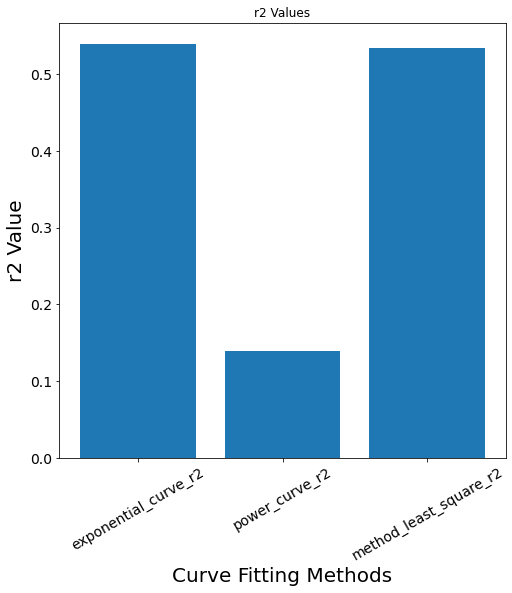

In [ ]:
x = ['exponential_curve_r2', 'power_curve_r2', 'method_least_square_r2']
height = [res_exp_curve['r2'], res_power_curve['r2'], res_mls['r2']]
fig = plt.figure(figsize=(8, 8))
plt.bar(x, height)
plt.title('r2 Values')
plt.xlabel('Curve Fitting Methods', fontsize=20)
plt.ylabel('r2 Value', fontsize=20)
plt.tick_params(labelsize=14)
plt.xticks(rotation=30)
plt.show()

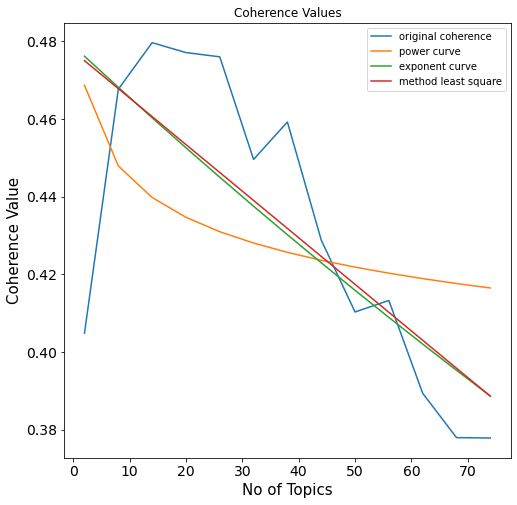

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.plot(no_of_topics, coherence_topics, label='original coherence')
plt.plot(no_of_topics, power_curve_coherence_calculated, label='power curve')
plt.plot(no_of_topics, exp_curve_coherence_calculated, label='exponent curve')
plt.plot(no_of_topics, mls_coherence_calculated, label='method least square')
plt.legend()

plt.title('Coherence Values')
plt.xlabel('No of Topics', fontsize=15)
plt.ylabel('Coherence Value', fontsize=15)
plt.tick_params(labelsize=14)

plt.show()

<h2> From the above three graphs, we can say that Method of Least Square gave the best result </h2>

## Passes Vs Coherence

In [ ]:
coherence_values = [0.4825, 0.4865, 0.4882, 0.4898, 0.4942, 0.4939, 0.4934, 0.495, 0.4928, 0.4946, 0.494, 0.4945]
passes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### Exponential Curve fit Result for Passes Vs Coherence value



In [ ]:
res_exp_curve_pass = exponential_curve_fit(passes, coherence_values)
res_exp_curve_pass

{'a': 0.48567753707953876,
 'b': 0.0018652319411691049,
 'r2': 0.6803725546521384}

<h3>Y = 0.4856 e<sup> -0.00186 X</sup>
<h3>r<sup> 2</sup> = 68% </h3>

In [ ]:
exp_curve_coherence_calculated_pass = []
for i in passes:
  exp_curve_coherence_calculated_pass.append(0.4856*(math.exp(-0.00186*i)))

In [ ]:
for i in range(len(coherence_values)):
  print("True coherence: ", coherence_values[i]," Calculated coherence: ", exp_curve_coherence_calculated_pass[i])

True coherence:  0.4825  Calculated coherence:  0.48469762347032774
True coherence:  0.4865  Calculated coherence:  0.48379692380103706
True coherence:  0.4882  Calculated coherence:  0.4828978978760665
True coherence:  0.4898  Calculated coherence:  0.4820005425851451
True coherence:  0.4942  Calculated coherence:  0.48110485482378157
True coherence:  0.4939  Calculated coherence:  0.4802108314932536
True coherence:  0.4934  Calculated coherence:  0.47931846950059726
True coherence:  0.495  Calculated coherence:  0.47842776575859614
True coherence:  0.4928  Calculated coherence:  0.4775387171857705
True coherence:  0.4946  Calculated coherence:  0.47665132070636723
True coherence:  0.494  Calculated coherence:  0.47576557325034846
True coherence:  0.4945  Calculated coherence:  0.47488147175338147


In [ ]:
exponential_curve_mse_pass = mean_squared_error(coherence_values, exp_curve_coherence_calculated_pass)
exponential_curve_mse_pass

0.0001837772845230623

### Power Curve fit Result for Passes Vs Coherence value

In [ ]:
res_power_curve_pass = power_curve_fit(passes, coherence_values)
res_power_curve_pass

{'a': 0.48333969472584887, 'b': 0.010176024793683213, 'r2': 0.8899177143764301}

<h3>Y = 0.4833 X<sup> 0.0101</sup>
<h3>r<sup> 2</sup> = 88% </h3>

In [ ]:
power_curve_coherence_calculated_pass = []
for i in passes:
  power_curve_coherence_calculated_pass.append(0.4833*(math.pow(i, 0.0101)))

In [ ]:
for i in range(len(coherence_values)):
  print("True coherence: ", coherence_values[i]," Calculated coherence: ", power_curve_coherence_calculated_pass[i])

True coherence:  0.4825  Calculated coherence:  0.4833
True coherence:  0.4865  Calculated coherence:  0.4866953513243242
True coherence:  0.4882  Calculated coherence:  0.48869255162879777
True coherence:  0.4898  Calculated coherence:  0.49011455617775157
True coherence:  0.4942  Calculated coherence:  0.49122039747092744
True coherence:  0.4939  Calculated coherence:  0.49212578751201774
True coherence:  0.4934  Calculated coherence:  0.4928925856790664
True coherence:  0.495  Calculated coherence:  0.49355778213965656
True coherence:  0.4928  Calculated coherence:  0.4941452721238676
True coherence:  0.4946  Calculated coherence:  0.4946713923542049
True coherence:  0.494  Calculated coherence:  0.4951478085397706
True coherence:  0.4945  Calculated coherence:  0.4955831430766008


In [ ]:
power_curve_mse_pass = mean_squared_error(coherence_values, power_curve_coherence_calculated_pass)
power_curve_mse_pass

1.6407129161092182e-06

### Method of Least Square Result for No of Topics Vs Coherence value

In [ ]:
res_mls_pass = method_least_square(passes, coherence_values)
res_mls_pass

{'a': 0.48568030303030296,
 'b': 0.0009132867132867214,
 'r2': 0.6812743641174507}

<h3>Y = 0.4856 - (0.0009 * x)
<h3>r<sup> 2</sup> = 68% </h3>

In [ ]:
mls_coherence_calculated_pass = []
for i in passes:
  mls_coherence_calculated_pass.append(0.4856 - (0.0009*i))

In [ ]:
for i in range(len(coherence_values)):
  print("True coherence: ", coherence_values[i]," Calculated coherence: ", mls_coherence_calculated_pass[i])

True coherence:  0.4825  Calculated coherence:  0.48469999999999996
True coherence:  0.4865  Calculated coherence:  0.48379999999999995
True coherence:  0.4882  Calculated coherence:  0.4829
True coherence:  0.4898  Calculated coherence:  0.482
True coherence:  0.4942  Calculated coherence:  0.48109999999999997
True coherence:  0.4939  Calculated coherence:  0.48019999999999996
True coherence:  0.4934  Calculated coherence:  0.47929999999999995
True coherence:  0.495  Calculated coherence:  0.4784
True coherence:  0.4928  Calculated coherence:  0.4775
True coherence:  0.4946  Calculated coherence:  0.47659999999999997
True coherence:  0.494  Calculated coherence:  0.47569999999999996
True coherence:  0.4945  Calculated coherence:  0.4748


In [ ]:
mls_mse_pass = mean_squared_error(coherence_values, mls_coherence_calculated_pass)
mls_mse_pass

0.00018465000000000053

### Visualization

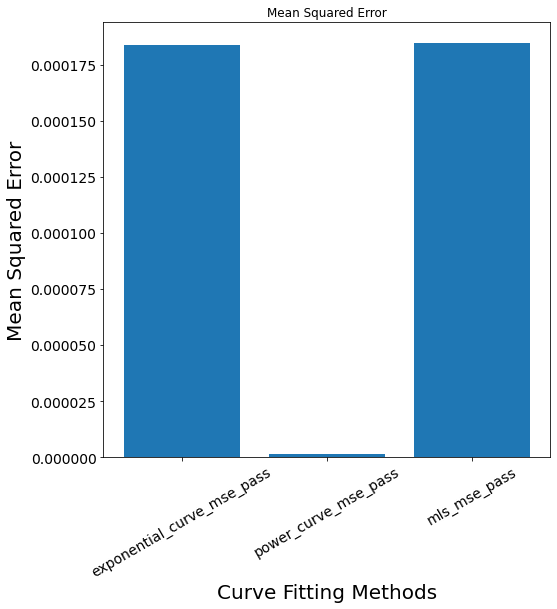

In [ ]:
x = ['exponential_curve_mse_pass', 'power_curve_mse_pass', 'mls_mse_pass']
height = [exponential_curve_mse_pass, power_curve_mse_pass, mls_mse_pass]
fig = plt.figure(figsize=(8, 8))
plt.bar(x, height)
plt.title('Mean Squared Error')
plt.xlabel('Curve Fitting Methods', fontsize=20)
plt.ylabel('Mean Squared Error', fontsize=20)
plt.tick_params(labelsize=14)
plt.xticks(rotation=30)
plt.show()

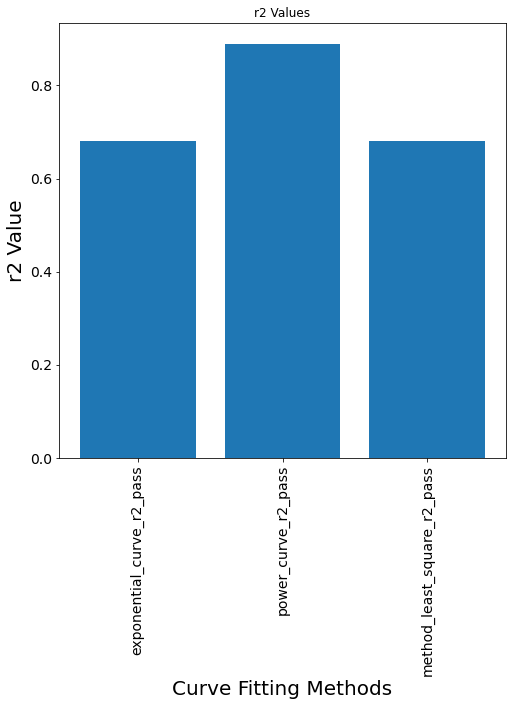

In [ ]:
x = ['exponential_curve_r2_pass', 'power_curve_r2_pass', 'method_least_square_r2_pass']
height = [res_exp_curve_pass['r2'], res_power_curve_pass['r2'], res_mls_pass['r2']]
fig = plt.figure(figsize=(8, 8))
plt.bar(x, height)
plt.title('r2 Values')
plt.xlabel('Curve Fitting Methods', fontsize=20)
plt.ylabel('r2 Value', fontsize=20)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
plt.show()

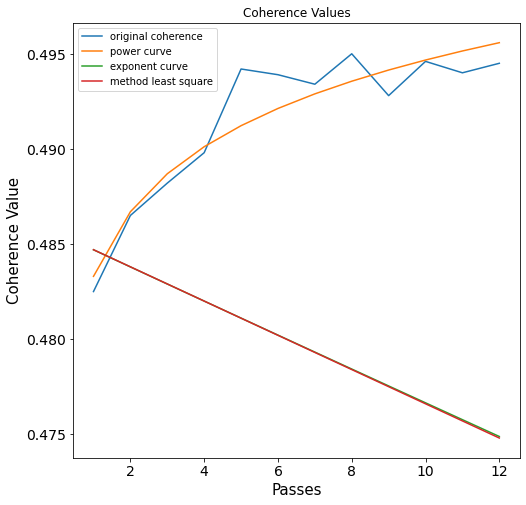

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.plot(passes, coherence_values, label='original coherence')
plt.plot(passes, power_curve_coherence_calculated_pass, label='power curve')
plt.plot(passes, exp_curve_coherence_calculated_pass, label='exponent curve')
plt.plot(passes, mls_coherence_calculated_pass, label='method least square')
plt.legend()

plt.title('Coherence Values')
plt.xlabel('Passes', fontsize=15)
plt.ylabel('Coherence Value', fontsize=15)
plt.tick_params(labelsize=14)

plt.show()

<h2> From the above three graphs, we can say that Method of Least Square gave the best result </h2>

## Passes Vs Perplexity

In [ ]:
perplexity_values = [-7.1204, -7.1167, -7.1165, -7.1163, -7.1165, -7.1165, -7.1165, -7.1166, -7.1167, -7.1167, -7.117, -7.117]
passes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### Method of Least Square Result for No of Topics Vs Perplexity value

In [ ]:
res_mls_pass_per = method_least_square(passes, perplexity_values)
res_mls_pass_per

{'a': -7.117654545454545,
 'b': 0.0001083916083914303,
 'r2': 0.12491226261531942}

<h3>Y = -7.1176 - (0.000108 * x)
<h3>r<sup> 2</sup> = 12.5% </h3>

In [ ]:
mls_perplexity_calculated_pass_per = []
for i in passes:
  mls_perplexity_calculated_pass_per.append(-7.1176 - (0.000108*i))

In [ ]:
for i in range(len(perplexity_values)):
  print("True perplexity: ", perplexity_values[i]," Calculated perplexity: ", mls_perplexity_calculated_pass_per[i])

True perplexity:  -7.1204  Calculated perplexity:  -7.117708
True perplexity:  -7.1167  Calculated perplexity:  -7.117816
True perplexity:  -7.1165  Calculated perplexity:  -7.117924
True perplexity:  -7.1163  Calculated perplexity:  -7.118032
True perplexity:  -7.1165  Calculated perplexity:  -7.11814
True perplexity:  -7.1165  Calculated perplexity:  -7.118248
True perplexity:  -7.1165  Calculated perplexity:  -7.118356
True perplexity:  -7.1166  Calculated perplexity:  -7.118464
True perplexity:  -7.1167  Calculated perplexity:  -7.118572
True perplexity:  -7.1167  Calculated perplexity:  -7.11868
True perplexity:  -7.117  Calculated perplexity:  -7.118788
True perplexity:  -7.117  Calculated perplexity:  -7.118896


In [ ]:
mls_mse_pass_per = mean_squared_error(perplexity_values, mls_perplexity_calculated_pass_per)
mls_mse_pass_per

3.3667333333341947e-06

### Visualization

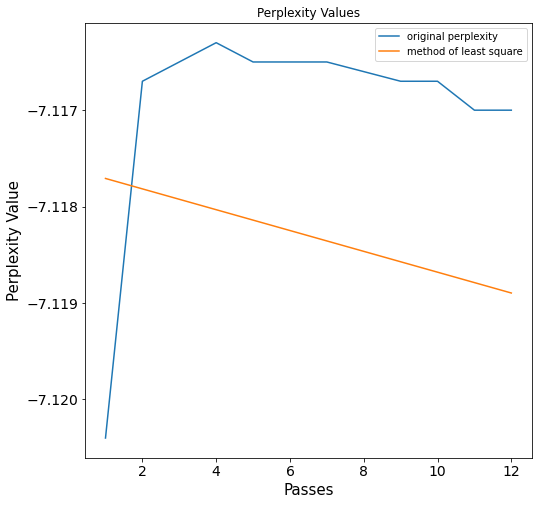

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.plot(passes, perplexity_values, label='original perplexity')
plt.plot(passes, mls_perplexity_calculated_pass_per, label='method of least square')
plt.legend()

plt.title('Perplexity Values')
plt.xlabel('Passes', fontsize=15)
plt.ylabel('Perplexity Value', fontsize=15)
plt.tick_params(labelsize=14)

plt.show()

## LOESS Smoothing data using regression

LOESS user defined function. <br>
[source code](https://github.com/joaofig/pyloess/blob/master/pyloess/Loess.py)

In [ ]:
def tricubic(x):
    y = np.zeros_like(x)
    idx = (x >= -1) & (x <= 1)
    y[idx] = np.power(1.0 - np.power(np.abs(x[idx]), 3), 3)
    return y


class Loess(object):

    @staticmethod
    def normalize_array(array):
        min_val = np.min(array)
        max_val = np.max(array)
        return (array - min_val) / (max_val - min_val), min_val, max_val

    def __init__(self, xx, yy, degree=1):
        self.n_xx, self.min_xx, self.max_xx = self.normalize_array(xx)
        self.n_yy, self.min_yy, self.max_yy = self.normalize_array(yy)
        self.degree = degree

    @staticmethod
    def get_min_range(distances, window):
        min_idx = np.argmin(distances)
        n = len(distances)
        if min_idx == 0:
            return np.arange(0, window)
        if min_idx == n-1:
            return np.arange(n - window, n)

        min_range = [min_idx]
        while len(min_range) < window:
            i0 = min_range[0]
            i1 = min_range[-1]
            if i0 == 0:
                min_range.append(i1 + 1)
            elif i1 == n-1:
                min_range.insert(0, i0 - 1)
            elif distances[i0-1] < distances[i1+1]:
                min_range.insert(0, i0 - 1)
            else:
                min_range.append(i1 + 1)
        return np.array(min_range)

    @staticmethod
    def get_weights(distances, min_range):
        max_distance = np.max(distances[min_range])
        weights = tricubic(distances[min_range] / max_distance)
        return weights

    def normalize_x(self, value):
        return (value - self.min_xx) / (self.max_xx - self.min_xx)

    def denormalize_y(self, value):
        return value * (self.max_yy - self.min_yy) + self.min_yy

    def estimate(self, x, window, use_matrix=False, degree=1):
        n_x = self.normalize_x(x)
        distances = np.abs(self.n_xx - n_x)
        min_range = self.get_min_range(distances, window)
        weights = self.get_weights(distances, min_range)

        if use_matrix or degree > 1:
            wm = np.multiply(np.eye(window), weights)
            xm = np.ones((window, degree + 1))

            xp = np.array([[math.pow(n_x, p)] for p in range(degree + 1)])
            for i in range(1, degree + 1):
                xm[:, i] = np.power(self.n_xx[min_range], i)

            ym = self.n_yy[min_range]
            xmt_wm = np.transpose(xm) @ wm
            beta = np.linalg.pinv(xmt_wm @ xm) @ xmt_wm @ ym
            y = (beta @ xp)[0]
        else:
            xx = self.n_xx[min_range]
            yy = self.n_yy[min_range]
            sum_weight = np.sum(weights)
            sum_weight_x = np.dot(xx, weights)
            sum_weight_y = np.dot(yy, weights)
            sum_weight_x2 = np.dot(np.multiply(xx, xx), weights)
            sum_weight_xy = np.dot(np.multiply(xx, yy), weights)

            mean_x = sum_weight_x / sum_weight
            mean_y = sum_weight_y / sum_weight

            b = (sum_weight_xy - mean_x * mean_y * sum_weight) / \
                (sum_weight_x2 - mean_x * mean_x * sum_weight)
            a = mean_y - b * mean_x
            y = a + b * n_x
        return self.denormalize_y(y)

In [ ]:
coherence_topics_arr = np.array([0.4048223019407592, 0.4676388252010352, 0.4796279020723006, 0.4770809870073456, 0.4759895900112251, 0.4495640451714338, 0.4592129140352393, 0.42881682586055375, 0.4102821117313581, 0.41324611289867125, 0.38935282883286887, 0.37792997240752146, 0.3778223605315474])
no_of_topics_arr = np.array([2, 8, 14, 20, 26, 32, 38, 44, 50, 56, 62, 68, 74])
loess = Loess(no_of_topics_arr, coherence_topics_arr)
smoothened_coh_topic = []
i = 0
for x in no_of_topics_arr:
    y = loess.estimate(x, window=7, use_matrix=False, degree=1)
    print(x, y, coherence_topics_arr[i])
    i += 1
    smoothened_coh_topic.append(y)

2 0.42956237520412227 0.4048223019407592
8 0.4466475776526244 0.4676388252010352
14 0.4619552336922956 0.4796279020723006
20 0.47375625568553376 0.4770809870073456
26 0.4681797345622626 0.4759895900112251
32 0.4594903419353042 0.4495640451714338
38 0.445728816805482 0.4592129140352393
44 0.4323758410352551 0.42881682586055375
50 0.41859573537515227 0.4102821117313581
56 0.4043846840380746 0.41324611289867125
62 0.39375321393450025 0.38935282883286887
68 0.38348178767468566 0.37792997240752146
74 0.3731293673529328 0.3778223605315474


### Exponential Curve fit Result for No of Topics Vs Coherence value (smoothened data)

In [ ]:
new_res_exp_curve = exponential_curve_fit(no_of_topics, smoothened_coh_topic)
new_res_exp_curve

{'a': 0.4761597476178613,
 'b': -0.0027528469781730102,
 'r2': 0.6680622187827386}

<h3>Y = 0.47615 e<sup> -0.00275 X</sup>
<h3>r<sup> 2</sup> = 66.806% </h3>

In [ ]:
new_exp_curve_coherence_calculated = []
for i in no_of_topics:
  new_exp_curve_coherence_calculated.append(0.47615*(math.exp(-0.00275*i)))

In [ ]:
for i in range(len(smoothened_coh_topic)):
  print("True coherence: ", coherence_topics[i]," Calculated coherence: ", new_exp_curve_coherence_calculated[i])

True coherence:  0.4048223019407592  Calculated coherence:  0.4735383635836418
True coherence:  0.4676388252010352  Calculated coherence:  0.4657890879196337
True coherence:  0.4796279020723006  Calculated coherence:  0.45816662621186416
True coherence:  0.4770809870073456  Calculated coherence:  0.45066890319805136
True coherence:  0.4759895900112251  Calculated coherence:  0.44329387757679345
True coherence:  0.4495640451714338  Calculated coherence:  0.4360395414518115
True coherence:  0.4592129140352393  Calculated coherence:  0.4289039197852874
True coherence:  0.42881682586055375  Calculated coherence:  0.42188506986014773
True coherence:  0.4102821117313581  Calculated coherence:  0.4149810807511467
True coherence:  0.41324611289867125  Calculated coherence:  0.4081900728046055
True coherence:  0.38935282883286887  Calculated coherence:  0.4015101971266643
True coherence:  0.37792997240752146  Calculated coherence:  0.3949396350799101
True coherence:  0.3778223605315474  Calcula

In [ ]:
new_exponential_curve_mse = mean_squared_error(coherence_topics, new_exp_curve_coherence_calculated)
new_exponential_curve_mse

0.0006692612481106598

### Power Curve fit Result for No of Topics Vs Coherence value

In [ ]:
new_res_power_curve = power_curve_fit(no_of_topics, smoothened_coh_topic)
new_res_power_curve

{'a': 0.486436751581903, 'b': -0.03795691108718081, 'r2': 0.2447622817758359}

<h3>Y = 0.48643 X<sup> -0.03795</sup>
<h3>r<sup> 2</sup> = 24.47% </h3>

In [ ]:
new_power_curve_coherence_calculated = []
for i in no_of_topics:
  new_power_curve_coherence_calculated.append(0.48643*(math.pow(i, -0.03795)))

In [ ]:
for i in range(len(coherence_topics)):
  print("True coherence: ", coherence_topics[i]," Calculated coherence: ", new_power_curve_coherence_calculated[i])

True coherence:  0.4048223019407592  Calculated coherence:  0.473801316765286
True coherence:  0.4676388252010352  Calculated coherence:  0.44951903491344747
True coherence:  0.4796279020723006  Calculated coherence:  0.4400730697431378
True coherence:  0.4770809870073456  Calculated coherence:  0.43415645589910196
True coherence:  0.4759895900112251  Calculated coherence:  0.42985512906234663
True coherence:  0.4495640451714338  Calculated coherence:  0.4264812181803588
True coherence:  0.4592129140352393  Calculated coherence:  0.42370887829748716
True coherence:  0.42881682586055375  Calculated coherence:  0.4213580763271174
True coherence:  0.4102821117313581  Calculated coherence:  0.41931890211314854
True coherence:  0.41324611289867125  Calculated coherence:  0.4175193580146406
True coherence:  0.38935282883286887  Calculated coherence:  0.41590973621660093
True coherence:  0.37792997240752146  Calculated coherence:  0.41445428913730203
True coherence:  0.3778223605315474  Calcu

In [ ]:
new_power_curve_mse = mean_squared_error(coherence_topics, new_power_curve_coherence_calculated)
new_power_curve_mse

0.001219731133962738

### Method of Least Square Result for No of Topics Vs Coherence value

In [ ]:
new_res_mls = method_least_square(no_of_topics, smoothened_coh_topic)
new_res_mls

{'a': 0.4739830293818207, 'b': -0.001155340925132475, 'r2': 0.657983778440935}

<h3>Y = 0.47398 - (0.0011553 * x)
<h3>r<sup> 2</sup> = 65.798% </h3>

In [ ]:
new_mls_coherence_calculated = []
for i in no_of_topics:
  new_mls_coherence_calculated.append(0.47398 - (0.0011553*i))

In [ ]:
for i in range(len(coherence_topics)):
  print("True coherence: ", coherence_topics[i]," Calculated coherence: ", new_mls_coherence_calculated[i])

True coherence:  0.4048223019407592  Calculated coherence:  0.4716694
True coherence:  0.4676388252010352  Calculated coherence:  0.46473760000000003
True coherence:  0.4796279020723006  Calculated coherence:  0.45780580000000004
True coherence:  0.4770809870073456  Calculated coherence:  0.450874
True coherence:  0.4759895900112251  Calculated coherence:  0.4439422
True coherence:  0.4495640451714338  Calculated coherence:  0.4370104
True coherence:  0.4592129140352393  Calculated coherence:  0.43007860000000003
True coherence:  0.42881682586055375  Calculated coherence:  0.42314680000000005
True coherence:  0.4102821117313581  Calculated coherence:  0.416215
True coherence:  0.41324611289867125  Calculated coherence:  0.4092832
True coherence:  0.38935282883286887  Calculated coherence:  0.4023514
True coherence:  0.37792997240752146  Calculated coherence:  0.3954196
True coherence:  0.3778223605315474  Calculated coherence:  0.38848780000000005


In [ ]:
new_mls_mse = mean_squared_error(coherence_topics, new_mls_coherence_calculated)
new_mls_mse

0.0006419272277898088

### Visualization

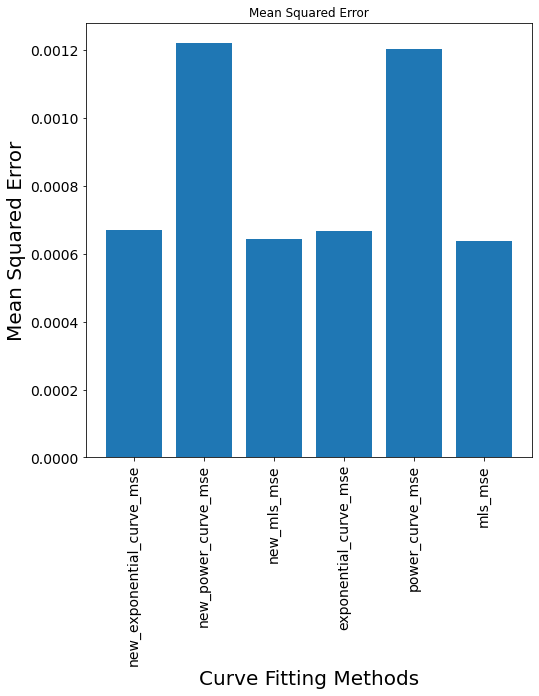

In [ ]:
x = ['new_exponential_curve_mse', 'new_power_curve_mse', 'new_mls_mse', 'exponential_curve_mse', 'power_curve_mse', 'mls_mse']
height = [new_exponential_curve_mse, new_power_curve_mse, new_mls_mse, exponential_curve_mse, power_curve_mse, mls_mse]

fig = plt.figure(figsize=(8, 8))
plt.bar(x, height)
plt.title('Mean Squared Error')
plt.xlabel('Curve Fitting Methods', fontsize=20)
plt.ylabel('Mean Squared Error', fontsize=20)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
plt.show()

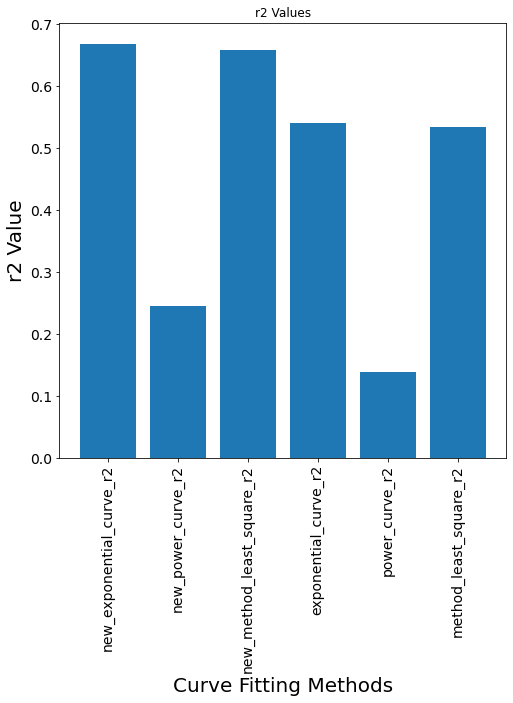

In [ ]:
x = ['new_exponential_curve_r2', 'new_power_curve_r2', 'new_method_least_square_r2', 'exponential_curve_r2', 'power_curve_r2', 'method_least_square_r2']
height = [new_res_exp_curve['r2'], new_res_power_curve['r2'], new_res_mls['r2'], res_exp_curve['r2'], res_power_curve['r2'], res_mls['r2']]

fig = plt.figure(figsize=(8, 8))
plt.bar(x, height)
plt.title('r2 Values')
plt.xlabel('Curve Fitting Methods', fontsize=20)
plt.ylabel('r2 Value', fontsize=20)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
plt.show()

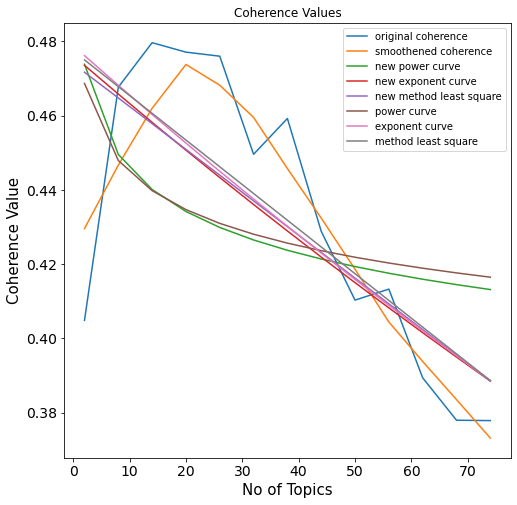

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.plot(no_of_topics, coherence_topics, label='original coherence')
plt.plot(no_of_topics, smoothened_coh_topic, label='smoothened coherence')
plt.plot(no_of_topics, new_power_curve_coherence_calculated, label='new power curve')
plt.plot(no_of_topics, new_exp_curve_coherence_calculated, label='new exponent curve')
plt.plot(no_of_topics, new_mls_coherence_calculated, label='new method least square')
plt.plot(no_of_topics, power_curve_coherence_calculated, label='power curve')
plt.plot(no_of_topics, exp_curve_coherence_calculated, label='exponent curve')
plt.plot(no_of_topics, mls_coherence_calculated, label='method least square')

plt.legend()

plt.title('Coherence Values')
plt.xlabel('No of Topics', fontsize=15)
plt.ylabel('Coherence Value', fontsize=15)
plt.tick_params(labelsize=14)

plt.show()

<h2> From the above three graphs, we can say that Method of Least Square gave the best result </h2>

## Passes Vs Coherence (new Data)

In [ ]:
coherence_values_arr = np.array([0.4825, 0.4865, 0.4882, 0.4898, 0.4942, 0.4939, 0.4934, 0.495, 0.4928, 0.4946, 0.494, 0.4945])
passes_arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

loess = Loess(passes_arr, coherence_values_arr)
smoothened_coh_values = []
i = 0
for x in passes_arr:
    y = loess.estimate(x, window=7, use_matrix=False, degree=1)
    print(x, y, coherence_values_arr[i])
    i += 1
    smoothened_coh_values.append(y)

1 0.4830797936348341 0.4825
2 0.4856107697256799 0.4865
3 0.4881506545702197 0.4882
4 0.49059792277507913 0.4898
5 0.4923146208043412 0.4942
6 0.49354856096742666 0.4939
7 0.4939584204921739 0.4934
8 0.49387565387364524 0.495
9 0.4940056394322641 0.4928
10 0.4940902161326272 0.4946
11 0.49422052322689203 0.494
12 0.49437495553240973 0.4945


### Exponential Curve fit Result for Passes Vs Coherence value



In [ ]:
new_res_exp_curve_pass = exponential_curve_fit(passes, smoothened_coh_values)
new_res_exp_curve_pass

{'a': 0.4854548315984261, 'b': 0.001895112020996088, 'r2': 0.7550821122884221}

<h3>Y = 0.48545 e<sup> -0.001895 X</sup>
<h3>r<sup> 2</sup> = 75.508% </h3>

In [ ]:
new_exp_curve_coherence_calculated_pass = []
for i in passes:
  new_exp_curve_coherence_calculated_pass.append(0.48545*(math.exp(-0.001895*i)))

In [ ]:
for i in range(len(coherence_values)):
  print("True coherence: ", coherence_values[i]," Calculated coherence: ", new_exp_curve_coherence_calculated_pass[i])

True coherence:  0.4825  Calculated coherence:  0.48453094333122326
True coherence:  0.4865  Calculated coherence:  0.48361362662569796
True coherence:  0.4882  Calculated coherence:  0.482698046589316
True coherence:  0.4898  Calculated coherence:  0.48178419993420546
True coherence:  0.4942  Calculated coherence:  0.48087208337871923
True coherence:  0.4939  Calculated coherence:  0.47996169364742297
True coherence:  0.4934  Calculated coherence:  0.4790530274710834
True coherence:  0.495  Calculated coherence:  0.4781460815866566
True coherence:  0.4928  Calculated coherence:  0.4772408527372763
True coherence:  0.4946  Calculated coherence:  0.47633733767224207
True coherence:  0.494  Calculated coherence:  0.47543553314700765
True coherence:  0.4945  Calculated coherence:  0.4745354359231696


In [ ]:
new_exponential_curve_mse_pass = mean_squared_error(coherence_values, new_exp_curve_coherence_calculated_pass)
new_exponential_curve_mse_pass

0.00019063462527703522

### Power Curve fit Result for Passes Vs Coherence value

In [ ]:
new_res_power_curve_pass = power_curve_fit(passes, smoothened_coh_values)
new_res_power_curve_pass

{'a': 0.48325747927977897, 'b': 0.010119398111250753, 'r2': 0.946119979028315}

<h3>Y = 0.48325 X<sup> 0.010119</sup>
<h3>r<sup> 2</sup> = 94.61% </h3>

In [ ]:
new_power_curve_coherence_calculated_pass = []
for i in passes:
  new_power_curve_coherence_calculated_pass.append(0.48325*(math.pow(i, 0.010119)))

In [ ]:
for i in range(len(coherence_values)):
  print("True coherence: ", coherence_values[i]," Calculated coherence: ", new_power_curve_coherence_calculated_pass[i])

True coherence:  0.4825  Calculated coherence:  0.48325
True coherence:  0.4865  Calculated coherence:  0.486651409114646
True coherence:  0.4882  Calculated coherence:  0.48865219358049033
True coherence:  0.4898  Calculated coherence:  0.4900767594273577
True coherence:  0.4942  Calculated coherence:  0.4911845979244685
True coherence:  0.4939  Calculated coherence:  0.4920916266381964
True coherence:  0.4934  Calculated coherence:  0.49285981509473065
True coherence:  0.495  Calculated coherence:  0.49352621945093217
True coherence:  0.4928  Calculated coherence:  0.4941147776327469
True coherence:  0.4946  Calculated coherence:  0.4946418555930749
True coherence:  0.494  Calculated coherence:  0.49511913993907436
True coherence:  0.4945  Calculated coherence:  0.4955552685297393


In [ ]:
new_power_curve_mse_pass = mean_squared_error(coherence_values, new_power_curve_coherence_calculated_pass)
new_power_curve_mse_pass

1.6491375211408826e-06

### Method of Least Square Result for Passes Vs Coherence value (new data)

In [ ]:
new_res_mls_pass = method_least_square(passes, smoothened_coh_values)
new_res_mls_pass

{'a': 0.48545284800624633,
 'b': 0.0009281225011876642,
 'r2': 0.7565794633272626}

<h3>Y = 0.48545 - (0.0009281 * x)
<h3>r<sup> 2</sup> = 75.65% </h3>

In [ ]:
new_mls_coherence_calculated_pass = []
for i in passes:
  new_mls_coherence_calculated_pass.append(0.48545 - (0.0009281*i))

In [ ]:
for i in range(len(coherence_values)):
  print("True coherence: ", coherence_values[i]," Calculated coherence: ", new_mls_coherence_calculated_pass[i])

True coherence:  0.4825  Calculated coherence:  0.4845219
True coherence:  0.4865  Calculated coherence:  0.4835938
True coherence:  0.4882  Calculated coherence:  0.4826657
True coherence:  0.4898  Calculated coherence:  0.4817376
True coherence:  0.4942  Calculated coherence:  0.4808095
True coherence:  0.4939  Calculated coherence:  0.4798814
True coherence:  0.4934  Calculated coherence:  0.47895329999999997
True coherence:  0.495  Calculated coherence:  0.4780252
True coherence:  0.4928  Calculated coherence:  0.4770971
True coherence:  0.4946  Calculated coherence:  0.476169
True coherence:  0.494  Calculated coherence:  0.47524089999999997
True coherence:  0.4945  Calculated coherence:  0.4743128


In [ ]:
new_mls_mse_pass = mean_squared_error(coherence_values, new_mls_coherence_calculated_pass)
new_mls_mse_pass

0.00019387934720833355

### Visualization

In [ ]:
exp_curve_coherence_calculated_pass

[0.48469762347032774,
 0.48379692380103706,
 0.4828978978760665,
 0.4820005425851451,
 0.48110485482378157,
 0.4802108314932536,
 0.47931846950059726,
 0.47842776575859614,
 0.4775387171857705,
 0.47665132070636723,
 0.47576557325034846,
 0.47488147175338147]

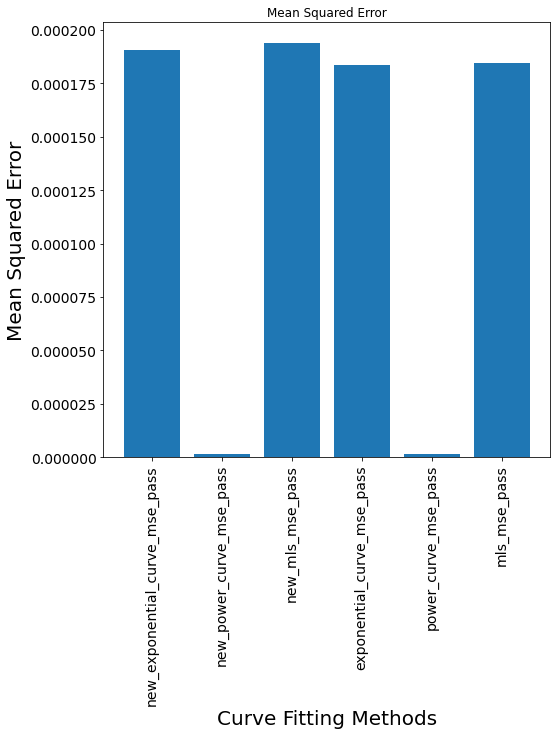

In [ ]:
x = ['new_exponential_curve_mse_pass', 'new_power_curve_mse_pass', 'new_mls_mse_pass', 'exponential_curve_mse_pass', 'power_curve_mse_pass', 'mls_mse_pass']
height = [new_exponential_curve_mse_pass, new_power_curve_mse_pass, new_mls_mse_pass, exponential_curve_mse_pass, power_curve_mse_pass, mls_mse_pass]

fig = plt.figure(figsize=(8, 8))
plt.bar(x, height)
plt.title('Mean Squared Error')
plt.xlabel('Curve Fitting Methods', fontsize=20)
plt.ylabel('Mean Squared Error', fontsize=20)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
plt.show()

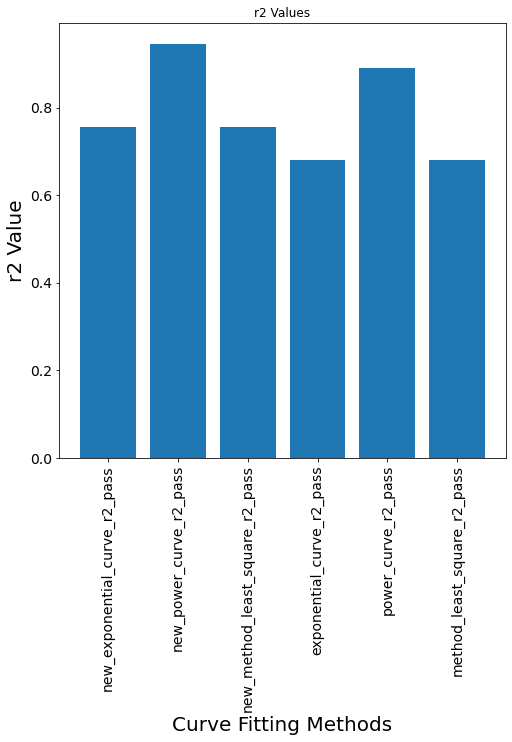

In [ ]:
x = ['new_exponential_curve_r2_pass', 'new_power_curve_r2_pass', 'new_method_least_square_r2_pass', 'exponential_curve_r2_pass', 'power_curve_r2_pass', 'method_least_square_r2_pass']
height = [new_res_exp_curve_pass['r2'], new_res_power_curve_pass['r2'], new_res_mls_pass['r2'], res_exp_curve_pass['r2'], res_power_curve_pass['r2'], res_mls_pass['r2']]
fig = plt.figure(figsize=(8, 8))
plt.bar(x, height)
plt.title('r2 Values')
plt.xlabel('Curve Fitting Methods', fontsize=20)
plt.ylabel('r2 Value', fontsize=20)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
plt.show()

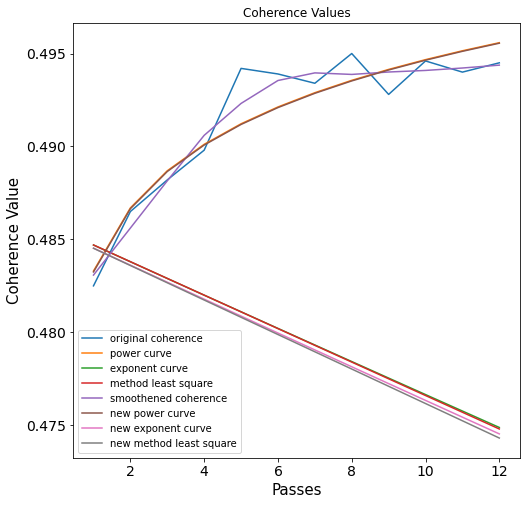

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.plot(passes, coherence_values, label='original coherence')
plt.plot(passes, power_curve_coherence_calculated_pass, label='power curve')
plt.plot(passes, exp_curve_coherence_calculated_pass, label='exponent curve')
plt.plot(passes, mls_coherence_calculated_pass, label='method least square')

plt.plot(passes, smoothened_coh_values, label='smoothened coherence')
plt.plot(passes, new_power_curve_coherence_calculated_pass, label='new power curve')
plt.plot(passes, new_exp_curve_coherence_calculated_pass, label='new exponent curve')
plt.plot(passes, new_mls_coherence_calculated_pass, label='new method least square')
plt.legend()

plt.title('Coherence Values')
plt.xlabel('Passes', fontsize=15)
plt.ylabel('Coherence Value', fontsize=15)
plt.tick_params(labelsize=14)

plt.show()

<h2> From the above three graphs, we can say that Method of Least Square gave the best result </h2>

## Passes Vs Perplexity (new data)

In [ ]:
perplexity_values_arr = np.array([-7.1204, -7.1167, -7.1165, -7.1163, -7.1165, -7.1165, -7.1165, -7.1166, -7.1167, -7.1167, -7.117, -7.117])
passes_arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

loess = Loess(passes_arr, perplexity_values_arr)
smoothened_per_values = []
i = 0
for x in passes_arr:
    y = loess.estimate(x, window=7, use_matrix=False, degree=1)
    print(x, y, perplexity_values_arr[i])
    i += 1
    smoothened_per_values.append(y)

1 -7.1190340099025216 -7.1204
2 -7.118069347648028 -7.1167
3 -7.117175282812845 -7.1165
4 -7.116462586611819 -7.1163
5 -7.116448722885942 -7.1165
6 -7.116489994602716 -7.1165
7 -7.116545649351597 -7.1165
8 -7.1166 -7.1166
9 -7.116684366840255 -7.1167
10 -7.116800346279228 -7.1167
11 -7.116910010135578 -7.117
12 -7.11702408094938 -7.117


### Method of Least Square Result for No of Topics Vs Perplexity value

In [ ]:
new_res_mls_per = method_least_square(passes, smoothened_per_values)
new_res_mls_per

{'a': -7.117782853424359,
 'b': 0.00011730568041514686,
 'r2': 0.2948467506526868}

<h3>Y = -7.11778 - (0.000117 * x)
<h3>r<sup> 2</sup> = 29.484% </h3>

In [ ]:
new_mls_perplexity_calculated = []
for i in passes:
  new_mls_perplexity_calculated.append(-7.11778 - (0.000117*i))

In [ ]:
for i in range(len(perplexity_values)):
  print("True perplexity: ", perplexity_values[i]," Calculated perplexity: ", new_mls_perplexity_calculated[i])

True perplexity:  -7.1204  Calculated perplexity:  -7.117897
True perplexity:  -7.1167  Calculated perplexity:  -7.118014
True perplexity:  -7.1165  Calculated perplexity:  -7.118131
True perplexity:  -7.1163  Calculated perplexity:  -7.1182479999999995
True perplexity:  -7.1165  Calculated perplexity:  -7.118365
True perplexity:  -7.1165  Calculated perplexity:  -7.118482
True perplexity:  -7.1165  Calculated perplexity:  -7.118599
True perplexity:  -7.1166  Calculated perplexity:  -7.118716
True perplexity:  -7.1167  Calculated perplexity:  -7.1188329999999995
True perplexity:  -7.1167  Calculated perplexity:  -7.11895
True perplexity:  -7.117  Calculated perplexity:  -7.119066999999999
True perplexity:  -7.117  Calculated perplexity:  -7.119184


In [ ]:
new_mls_mse_per = mean_squared_error(perplexity_values, new_mls_perplexity_calculated)
new_mls_mse_per

4.115900833332316e-06

### Visualization

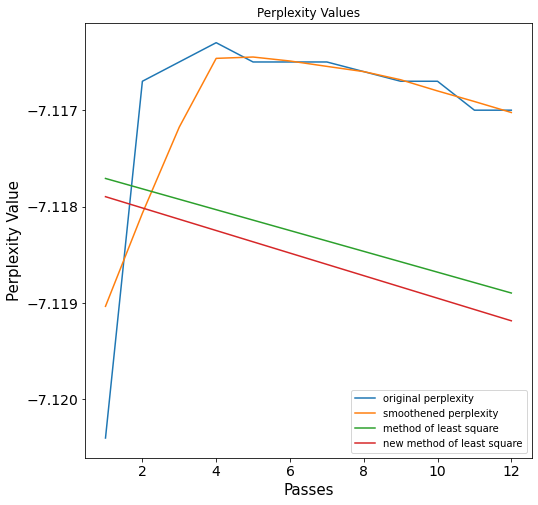

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.plot(passes, perplexity_values, label='original perplexity')
plt.plot(passes, smoothened_per_values, label='smoothened perplexity')
plt.plot(passes, mls_perplexity_calculated_pass_per, label='method of least square')
plt.plot(passes, new_mls_perplexity_calculated, label='new method of least square')
plt.legend()

plt.title('Perplexity Values')
plt.xlabel('Passes', fontsize=15)
plt.ylabel('Perplexity Value', fontsize=15)
plt.tick_params(labelsize=14)

plt.show()